# Preprocessing Household Water Usage Data
This document focuses on the preprocessing of a dataset related to household water usage to prepare it for further analysis and modeling.

## 1. Problem Definition
Given various household parameters and water usage data, the goal is to clean and prepare the data for predictive modeling or pattern analysis.

## 2. Data
The dataset contains information on household water usage and various household characteristics. The key attributes include water consumption, household size, type of residence, water source, and monthly water bills.

## 3. Preprocessing Steps
To ensure data quality and prepare it for analysis, we will undertake the following preprocessing steps:

1. **Handling Missing Values**
   - Identify and impute or remove missing values as needed.

2. **Data Type Conversion**
   - Convert columns to their appropriate data types (e.g., numerical, categorical).

3. **Categorical Encoding**
   - Convert categorical features such as 'Region', 'Type_of_Residence', and 'Water_Source' into numerical format using techniques like label encoding or one-hot encoding.

4. **Feature Creation**
   - Create additional features if needed, such as combining related columns or generating new time-based features.

5. **Normalization/Scaling**
   - Scale numerical features to ensure they are on the same scale for better model performance.

6. **Leakage Detection and Correction**
   - Examine and address any potential data leakage issues.

7. **Outlier Detection**
   - Identify and handle outliers to improve model robustness.

8. **Duplicate Removal**
   - Check and remove duplicate records to ensure data integrity.

## 4. Features Overview
Key features in the dataset include:

1. **Household_ID**: Unique identifier for each household.
2. **Daily_Water_Usage_Liters**: Average daily water consumption in liters.
3. **Number_of_Family_Members**: The number of family members in the household.
4. **Type_of_Residence**: Type of residence (e.g., house, apartment).
5. **Water_Source**: Source of water (e.g., municipal, rainwater harvesting).
6. **Monthly_Water_Bill**: The household's monthly water bill.
7. **Smart_Meter_Reading**: The latest reading from the household's smart water meter.
8. **Leakage_Detection**: Indicator for known water leakage issues (Yes/No).
9. **Region**: Region of residence (e.g., Urban, Suburban, Rural).
10. **Income_Bracket**: Income classification of the household.
11. **Number_of_Bathrooms**: Total number of bathrooms in the household.
12. **Average_Shower_Time_Minutes**: Average duration of showers in minutes.
13. **Rainwater_Harvesting**: Indicator for rainwater harvesting usage (Yes/No).
14. **Month**: Simulated month for each record to represent seasonal variations.

## 5. Tools for Preprocessing
We'll use libraries such as Pandas, NumPy, and Scikit-learn for data cleaning and transformation. Visualization libraries like Matplotlib and Seaborn may also be used to identify data quality issues and patterns.

By following these steps, the dataset will be ready for further analysis and predictive modeling.




## Preparing the tools

We're going to use pandas, numpy ,Matplotlib and NUmpy for data analysis and manupulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

## Load data

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,Household_ID,Daily_Water_Usage_Liters,Number_of_Family_Members,Type_of_Residence,Water_Source,Monthly_Water_Bill,Smart_Meter_Reading,Leakage_Detection,Region,Income_Bracket,Number_of_Bathrooms,Average_Shower_Time_Minutes,Rainwater_Harvesting
0,NaN,224.84,NaN,apartment,NaN,32.44,220.14,Yes,Suburban,NaN,1.0,8.35,No
1,HH000002,193.09,4.0,NaN,municipal,27.87,189.72,No,Urban,Medium,2.0,5.05,No
2,HH000003,232.38,3.0,apartment,borewell,38.31,NaN,No,NaN,NaN,1.0,3.00,No
3,NaN,NaN,4.0,apartment,municipal,40.82,280.65,NaN,NaN,NaN,NaN,8.64,No
4,HH000005,NaN,NaN,NaN,municipal,26.35,NaN,No,Urban,NaN,NaN,11.10,NaN


In [25]:
#Checking NaN Values
df.isna().sum()


Household_ID                   0
Daily_Water_Usage_Liters       0
Number_of_Family_Members       0
Type_of_Residence              0
Water_Source                   0
Monthly_Water_Bill             0
Smart_Meter_Reading            0
Leakage_Detection              0
Region                         0
Income_Bracket                 0
Number_of_Bathrooms            0
Average_Shower_Time_Minutes    0
Rainwater_Harvesting           0
dtype: int64

In [26]:
#checking the data types of each coloumn
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19618 entries, 1 to 119989
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Household_ID                 19618 non-null  object 
 1   Daily_Water_Usage_Liters     19618 non-null  float64
 2   Number_of_Family_Members     19618 non-null  object 
 3   Type_of_Residence            19618 non-null  object 
 4   Water_Source                 19618 non-null  object 
 5   Monthly_Water_Bill           19618 non-null  float64
 6   Smart_Meter_Reading          19618 non-null  float64
 7   Leakage_Detection            19618 non-null  object 
 8   Region                       19618 non-null  object 
 9   Income_Bracket               19618 non-null  object 
 10  Number_of_Bathrooms          19618 non-null  object 
 11  Average_Shower_Time_Minutes  19618 non-null  float64
 12  Rainwater_Harvesting         19618 non-null  object 
dtypes: float64(4), objec

In [5]:
df.describe()

,Daily_Water_Usage_Liters,Number_of_Family_Members,Monthly_Water_Bill,Smart_Meter_Reading,Number_of_Bathrooms,Average_Shower_Time_Minutes
count,84207.000000,83939.000000,83729.000000,83893.000000,83949.000000,83977.000000
mean,200.368971,3.997415,30.009449,200.057700,1.847443,8.061681
std,50.053684,1.726458,7.692073,50.331574,0.855259,2.886127
min,50.000000,1.000000,6.760000,34.310000,1.000000,3.000000
25%,166.485000,3.000000,24.790000,165.990000,1.000000,5.970000
50%,200.580000,4.000000,29.900000,200.160000,2.000000,8.000000
75%,234.010000,5.000000,35.170000,234.040000,2.000000,10.050000
max,423.950000,14.000000,62.290000,423.110000,4.000000,19.650000


In [27]:

df.T

,1,8,23,36,40,43,48,53,55,70,...,119931,119934,119940,119951,119956,119971,119980,119982,119987,119989
Household_ID,HH000002,HH000009,HH000024,HH000037,HH000041,HH000044,HH000049,HH000054,HH000056,HH000071,...,HH119932,HH119935,HH119941,HH119952,HH119957,HH119972,HH119981,HH119983,HH119988,HH119990
Daily_Water_Usage_Liters,193.09,176.53,128.76,210.44,236.92,184.94,217.18,230.58,246.56,218.07,...,216.87,186.11,183.73,308.31,180.8,189.24,256.42,157.9,179.4,189.97
Number_of_Family_Members,4.0,5.0,6.0,3.0,4.0,3.0,3,5.0,3.0,4.0,...,9.0,8.0,2.0,4.0,2.0,3.0,3.0,2.0,4.0,3
Type_of_Residence,apartment,apartment,house,apartment,apartment,apartment,apartment,apartment,house,house,...,apartment,apartment,apartment,apartment,apartment,apartment,house,apartment,apartment,apartment
Water_Source,municipal,municipal,municipal,rainwater harvesting,municipal,municipal,municipal,municipal,municipal,municipal,...,municipal,rainwater harvesting,municipal,municipal,borewell,well,rainwater harvesting,borewell,municipal,municipal
Monthly_Water_Bill,27.87,28.81,19.75,34.43,32.49,28.7,30.32,34.12,37.27,34.77,...,30.97,26.53,27.11,41.68,29.51,28.02,42.02,25.83,24.79,29.4
Smart_Meter_Reading,189.72,172.1,141.61,203.16,236.51,195.55,211.04,232.47,241.91,218.96,...,218.17,190.77,184.71,306.44,189.82,189.1,258.8,155.01,179.52,188.05
Leakage_Detection,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
Region,Urban,Suburban,Suburban,Urban,Rural,Urban,Urban,Urban,Urban,Urban,...,Urban,Suburban,Urban,Urban,Rural,Urban,Suburban,Urban,Suburban,Urban
Income_Bracket,Medium,Medium,Medium,Low,Medium,High,Medium,Medium,Medium,Medium,...,High,Medium,Medium,High,Low,Medium,Low,Medium,Low,Medium


In [7]:
df.head()

,Household_ID,Daily_Water_Usage_Liters,Number_of_Family_Members,Type_of_Residence,Water_Source,Monthly_Water_Bill,Smart_Meter_Reading,Leakage_Detection,Region,Income_Bracket,Number_of_Bathrooms,Average_Shower_Time_Minutes,Rainwater_Harvesting
0,NaN,224.84,NaN,apartment,NaN,32.44,220.14,Yes,Suburban,NaN,1.0,8.35,No
1,HH000002,193.09,4.0,NaN,municipal,27.87,189.72,No,Urban,Medium,2.0,5.05,No
2,HH000003,232.38,3.0,apartment,borewell,38.31,NaN,No,NaN,NaN,1.0,3.00,No
3,NaN,NaN,4.0,apartment,municipal,40.82,280.65,NaN,NaN,NaN,NaN,8.64,No
4,HH000005,NaN,NaN,NaN,municipal,26.35,NaN,No,Urban,NaN,NaN,11.10,NaN


In [29]:
#droping the na value in household_id
df.dropna(subset=["Household_ID"], inplace=True)

In [9]:
df.isna().sum()

Household_ID                       0
Daily_Water_Usage_Liters       24926
Number_of_Family_Members       25177
Type_of_Residence              25048
Water_Source                   25144
Monthly_Water_Bill             25389
Smart_Meter_Reading            25289
Leakage_Detection              25137
Region                         25049
Income_Bracket                 25015
Number_of_Bathrooms            24974
Average_Shower_Time_Minutes    25111
Rainwater_Harvesting           25049
dtype: int64

## counting the categorical values

In [10]:
df["Type_of_Residence"].value_counts()

Type_of_Residence
apartment    35140
house        23542
Name: count, dtype: int64

In [11]:
df["Water_Source"].value_counts()

Water_Source
municipal               40860
borewell                 8949
rainwater harvesting     5895
well                     2882
Name: count, dtype: int64

In [12]:
df["Region"].value_counts()

Region
Urban       29429
Suburban    17512
Rural       11740
Name: count, dtype: int64

In [13]:
df["Income_Bracket"].value_counts()

Income_Bracket
Medium    29481
Low       17649
High      11585
Name: count, dtype: int64

In [14]:
df["Number_of_Bathrooms"].value_counts()

Number_of_Bathrooms
1.0    23635
2.0    23348
3.0     8750
4.0     3023
Name: count, dtype: int64

In [15]:
df["Rainwater_Harvesting"].value_counts()

Rainwater_Harvesting
No     52690
Yes     5991
Name: count, dtype: int64

In [16]:
df["Number_of_Family_Members"].value_counts()

Number_of_Family_Members
4.0     13405
3.0     13144
5.0      9703
2.0      8727
6.0      5831
7.0      2931
1.0      2894
8.0      1226
9.0       491
10.0      144
11.0       40
12.0       13
13.0        3
14.0        1
Name: count, dtype: int64

In [17]:
df["Leakage_Detection"].value_counts()

Leakage_Detection
No     55721
Yes     2872
Name: count, dtype: int64

## Filling missing value with maximum occurance 

In [32]:
# Fill the make column
df["Type_of_Residence"].fillna("apartment",inplace = True)

# Fill the colore column
df["Water_Source"].fillna("municipal",inplace=True)

df["Region"].fillna("Urban",inplace=True)

df["Income_Bracket"].fillna("Medium",inplace=True)

df["Number_of_Bathrooms"].fillna("1",inplace=True)

df["Rainwater_Harvesting"].fillna("No",inplace=True)

df["Number_of_Family_Members"].fillna("3",inplace=True)

df["Leakage_Detection"].fillna("No",inplace=True)

warnings.filterwarnings("ignore")

In [19]:
df.head()

,Household_ID,Daily_Water_Usage_Liters,Number_of_Family_Members,Type_of_Residence,Water_Source,Monthly_Water_Bill,Smart_Meter_Reading,Leakage_Detection,Region,Income_Bracket,Number_of_Bathrooms,Average_Shower_Time_Minutes,Rainwater_Harvesting
1,HH000002,193.09,4.0,apartment,municipal,27.87,189.72,No,Urban,Medium,2.0,5.05,No
2,HH000003,232.38,3.0,apartment,borewell,38.31,NaN,No,Urban,Medium,1.0,3.00,No
4,HH000005,NaN,3,apartment,municipal,26.35,NaN,No,Urban,Medium,1,11.10,No
5,HH000006,NaN,3.0,house,borewell,NaN,NaN,Yes,Urban,Low,1.0,6.70,No
6,HH000007,NaN,2.0,house,municipal,43.22,281.92,No,Rural,Low,1,10.52,No


In [20]:
df.isna().sum()

Household_ID                       0
Daily_Water_Usage_Liters       24926
Number_of_Family_Members           0
Type_of_Residence                  0
Water_Source                       0
Monthly_Water_Bill             25389
Smart_Meter_Reading            25289
Leakage_Detection                  0
Region                             0
Income_Bracket                     0
Number_of_Bathrooms                0
Average_Shower_Time_Minutes    25111
Rainwater_Harvesting               0
dtype: int64

## removing the outliers

In [21]:

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_no_outliers


# Repeat for other numerical columns
numerical_cols = ['Daily_Water_Usage_Liters','Monthly_Water_Bill', 'Smart_Meter_Reading', 'Average_Shower_Time_Minutes']
for col in numerical_cols:
    df = remove_outliers(df, col)

## checking the outliers in the numerical coloumn by boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x15cb1ea7050>,
 'caps': [<matplotlib.lines.Line2D at 0x15cb1ea75f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15cad657da0>],
 'medians': [<matplotlib.lines.Line2D at 0x15cb1ea7ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15cb1ea7da0>],
 'means': []}

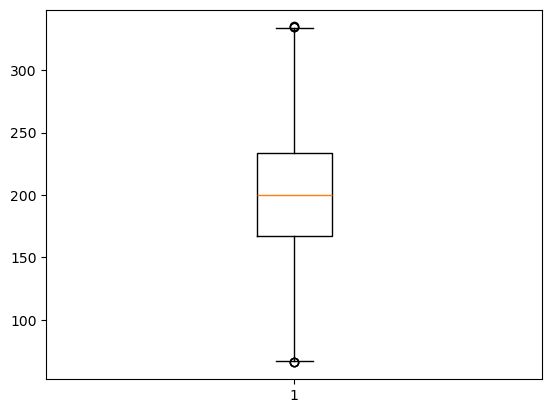

In [22]:
plt.boxplot(df["Daily_Water_Usage_Liters"])

{'whiskers': [<matplotlib.lines.Line2D at 0x15cb1f60950>,
 'caps': [<matplotlib.lines.Line2D at 0x15cb1f60ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15cb1f60620>],
 'medians': [<matplotlib.lines.Line2D at 0x15cb1f61430>],
 'fliers': [<matplotlib.lines.Line2D at 0x15cb1f61730>],
 'means': []}

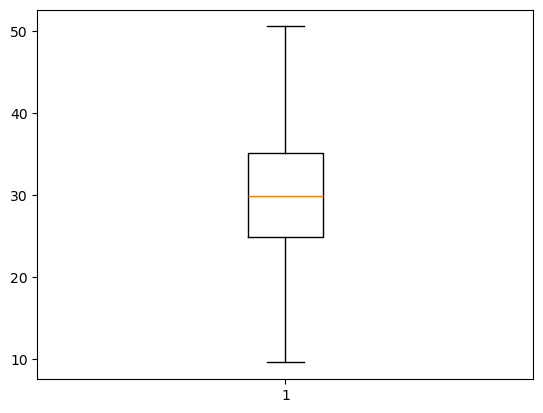

In [23]:
plt.boxplot(df['Monthly_Water_Bill'])

## Export preprocess file

In [24]:
df.to_csv("processed1.csv",index=True)